In [190]:
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
import re
import os
from IPython.display import Image 
import cv2
from tempfile import TemporaryFile
from scipy import stats
from torchvision import transforms
import pandas as pd
import shutil
import datetime
import glob
import torch.nn.functional as F
from scipy import integrate
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
from PIL import ImageFile, Image
import sys
sys.path.insert(1, '../architecture')
sys.path.insert(2, '../dataLoaders')
from CustSegFormer import *
import torchvision.models as models
from MapillaryDataLoader import *
from VolvoDataLoader import *
from volvoDataLoader_onFly import *
from MapillaryIntendedObjs import *
from tqdm import tqdm
from torcheval.metrics import R2Score
from torchsummary import summary
import torcheval
from torchmetrics.classification import MulticlassCalibrationError
import torchvision.transforms.functional as fun
%matplotlib inline

In [191]:
transform_in = transforms.Compose([
    transforms.Normalize([0.4191, 0.4586, 0.4700], [0.2553, 0.2675, 0.2945]),
    transforms.Resize((256,256))
])
transform_ou = transforms.Compose([
#     transforms.ToTensor(),
    transforms.Resize((256,256))
])

In [198]:
args = {
    "input_img_dim" : [256,256],
    "reducedCategories" : True,
    "volvoRootPath" : "../../../datasets/VolvoAnnotatedImages/rawDataset/images",
    "RSCD_cat" : ["ice", "fresh_snow", "dry_gravel", "wet_asphalt_severe", "dry_asphalt_severe"],
    "MapillSubsample" : 1.
}

dataloader = volvo_onFly(**{**args, **{"mode": "train"}})
val_loader = DataLoader(dataset = dataloader, batch_size = 32, shuffle = True, drop_last = True)

In [199]:
device = torch.device('cuda:0')
model = CustSegFormer(num_classes = dataloader.get_num_classes(), training = True, device = device)
check = torch.load("../checkpoints/HVAEFri_volvo_onTheFly_segformer_twoHeads_IEEE/best.pth", map_location=device)
model.load_state_dict(check['model_state_dict'], strict=False)


<All keys matched successfully>

model2 = CustSegFormer(num_classes = dataloader.get_num_classes(), training = True, device = device)
check = torch.load("../../HVAE_twoHead_finalExp_onFlyAug_newGECO/checkpoints/HVAEFri_volvo_onTheFly_crf3/best.pth", map_location=device)
model2.load_state_dict(check['model_state_dict'], strict=False)


In [206]:
# indices = 29, 44
sample = dataloader[44]

In [207]:
seg, fric = model.inference(sample["image"].unsqueeze(0).to(device))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 960x800 with 0 Axes>

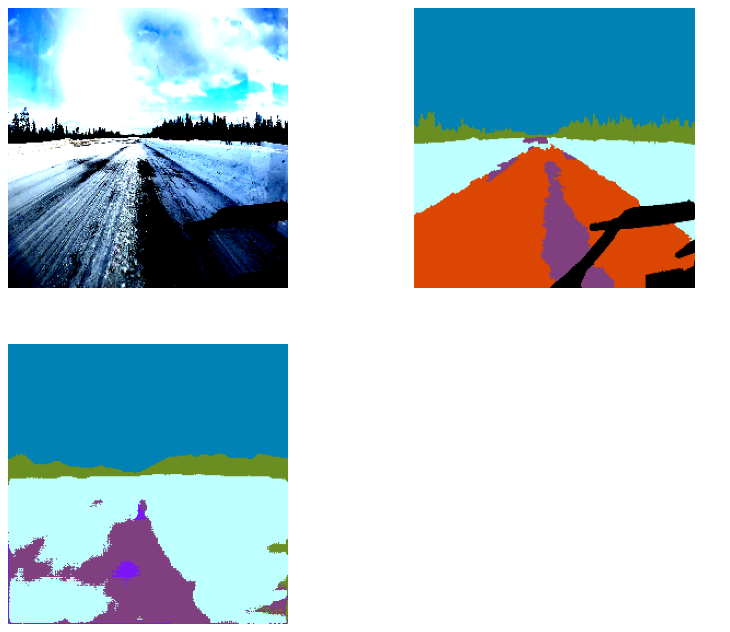

In [224]:
plt.figure(figsize=(12, 10), dpi=80)
f, axarr = plt.subplots(2,2, figsize=(12, 10), dpi=80)

axarr[0,0].imshow(transform_ou(sample["image"]).permute(1,2,0))
axarr[0,1].imshow(sample["seg"].permute(1,2,0))
axarr[1,0].imshow(dataloader.prMask_to_color(seg.cpu()).squeeze(0).permute(1,2,0)) 


for axs in axarr.reshape(-1):
    axs.axis("off")


plt.show()

